In [2]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
boston = load_boston()
mydata = pd.DataFrame(boston.data, columns = boston.feature_names)

X = mydata [["AGE", "RM"]]
Y = boston.target
mydata['PRICE'] = boston.target
Y = Y.reshape(506,1)
X = np.array(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)
#print(X_train , X_train.shape)
#print(Y_train , Y_train.shape)
#print(X_test , X_test.shape)
#print(Y_test , Y_test.shape)
mydata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
class AdalineReg:
    def __init__(self):
        pass
    
    def fit(self, X_train, Y_train):
        # W = (X.T * X)^-1 * (X.T * Y)
        self.w = np.matmul(inv(np.matmul(X_train.T,X_train)) , np.matmul(X_train.T, Y_train))  

    def predict(self, X_test):
        Y_pred = np.matmul(X_test, self.w) 
        return Y_pred
    
    def evaluate (self, X_test , Y_test):
        Y_pred = np.matmul(X_test, self.w) 
        subtract = np.abs(Y_test - Y_pred)
        #MAE
        MAE = np.mean(subtract) 
        #MSE
        MSE = np.mean(np.square(subtract))
        return MAE , MSE


In [5]:
model = AdalineReg()
model.fit(X_train,Y_train)

In [6]:
print("W is ----->" , model.w)

Y_pred = model.predict(X_test)
#print("Y_pred is ---->" , Y_pred)
#print("Y_test is ---->" , Y_test)

Loss = model.evaluate(X_test, Y_test)
print("MAE and MSE Are ---->" , Loss)

W is -----> [[-0.12415692]
 [ 4.98540065]]
MAE and MSE Are ----> (4.750335305815006, 53.32072787903511)


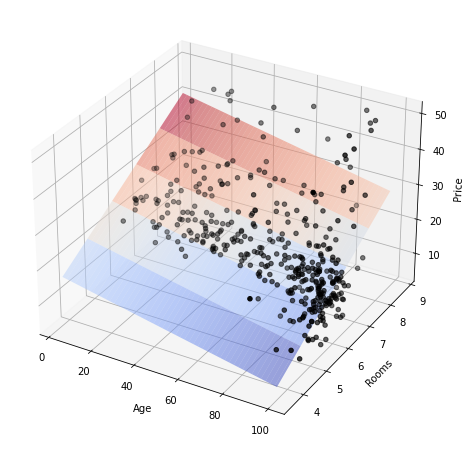

In [7]:
# create the figure
fig = plt.figure(figsize=(8,8))

# add axes
ax = fig.add_subplot(111,projection='3d')

x = np.arange(X_train[:,0].min(),X_train[:,0].max())
y = np.arange(X_train[:,1].min(),X_train[:,1].max())
x,y = np.meshgrid(x,y)

z = x *model.w[0] + y *model. w[1]

ax.plot_surface(x, y, z, alpha=0.5 ,  cmap='coolwarm')
ax.scatter(X_train[:,0], X_train[:,1], Y_train , c='black')


ax.set_xlabel('Age')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')

plt.show()